# Analysis 2

## imports

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('../data/scored_notes.tsv', sep='\t')
notes = pd.read_csv("../data/notes-00000.tsv", sep='\t')

/var/folders/1p/h191j1g97h7fp_g5rwt17vrr0000gp/T/ipykernel_28056/2125769971.py:1: DtypeWarning: Columns (7,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/scored_notes.tsv', sep='\t')
/var/folders/1p/h191j1g97h7fp_g5rwt17vrr0000gp/T/ipykernel_28056/2125769971.py:2: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  notes = pd.read_csv("../data/notes-00000.tsv", sep='\t')


## Different Levels of Helpfulness

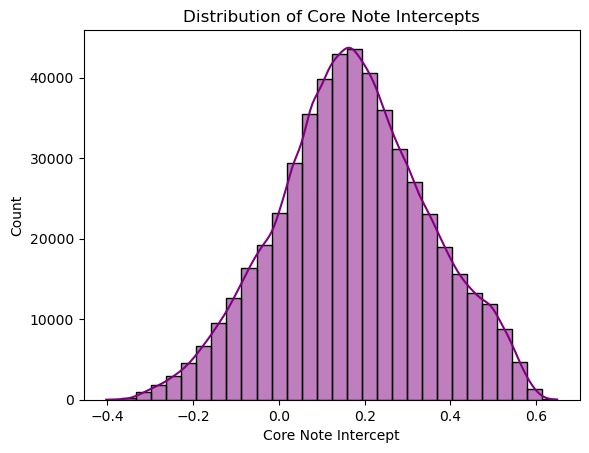

In [42]:
# kde for line
# plots histogram to see distribution to figure out where to divide into
# categories for helpfulness

sns.histplot(df['coreNoteIntercept'], bins=30, kde=True, color='purple')
plt.title('Distribution of Core Note Intercepts')
plt.xlabel('Core Note Intercept')
plt.ylabel('Count')
plt.show()

In [43]:
def categorize_intercept(intercept):
    if intercept > 0.5:
        return 'Most Helpful'
    elif intercept > 0.4:
        return 'Helpful'
    elif intercept > 0.3:
        return 'Slightly Helpful'
    elif intercept > -0.08:
        return 'Middle'
    else:
        return 'Unhelpful'

In [44]:
df['Category'] = df['coreNoteIntercept'].apply(categorize_intercept)

In [45]:
df['Category'].value_counts()

Category
Middle              356043
Unhelpful           313618
Slightly Helpful     65852
Helpful              39658
Most Helpful         17538
Name: count, dtype: int64

In [46]:
df_most_helpful = df[df['Category'] == 'Most Helpful'].copy()
df_helpful = df[df['Category'] == 'Helpful'].copy()
df_slightly_helpful = df[df['Category'] == 'Slightly Helpful'].copy()
df_middle = df[df['Category'] == 'Middle'].copy()
df_unhelpful = df[df['Category'] == 'Unhelpful'].copy()

In [8]:
from sample import sample

modified_notes = notes[["noteId", "summary"]].copy()
sample(df_most_helpful, modified_notes.copy(), "most_helpful")
sample(df_helpful, modified_notes.copy(), "helpful")
sample(df_slightly_helpful, modified_notes.copy(), "slightly_helpful")
sample(df_middle, modified_notes.copy(), "middle")
sample(df_unhelpful, modified_notes.copy(), "unhelpful")

## Mostly Helpful But Polarized

In [47]:
helpful_polarized_left = df[(df['Category'] == 'Helpful') & (df['coreNoteFactor1'] <= -0.5)].copy()
helpful_polarized_right = df[(df['Category'] == 'Helpful') & (df['coreNoteFactor1'] >= 0.5)].copy()


In [48]:
helpful_polarized_left.shape[0]
helpful_polarized_right.shape[0]

165

In [11]:
sample(helpful_polarized_left, modified_notes.copy(), "helpful_polarized_left")
sample(helpful_polarized_right, modified_notes.copy(), "helpful_polarized_right")

## High Average Helpfulness with High Polarization

In [51]:
most_helpful_polarized_left = df[(df['Category'] == 'Most Helpful') & (df['coreNoteFactor1'] <= -0.5)].copy()
most_helpful_polarized_right = df[(df['Category'] == 'Most Helpful') & (df['coreNoteFactor1'] >= 0.5)].copy()

In [52]:
notes.loc[notes["noteId"].isin(most_helpful_polarized_left["noteId"])]["summary"].to_csv("samples/most_helpful_polarized_left.tsv", sep="\t")

In [14]:
notes.loc[notes["noteId"].isin(most_helpful_polarized_right["noteId"])]["summary"].to_csv("samples/most_helpful_polarized_right.tsv", sep="\t")

## Categorizing

In [53]:
def quadrant(intercept, factor):
  if intercept >= 0.4 and factor < 0.5 and factor > -0.5:
    return "Helpful"
  elif intercept <= -0.08 and factor < 0.5 and factor > -0.5:
    return "Unhelpful"
  elif factor <= -0.5 and intercept < 0.4 and intercept > -0.08:
    return "Polarized Left"
  elif factor >= 0.5 and intercept < 0.4 and intercept > -0.08:
    return "Polarized Right"
  else:
    return "Center"

In [16]:
df['quadrant'] = df.apply(lambda row: quadrant(row['coreNoteIntercept'], row['coreNoteFactor1']), axis=1)
notes = notes.merge(df[['noteId', 'quadrant']], on='noteId', how='left')

## Language

In [54]:
### uncomment to get the notes with language file and put that into csv
# import swifter
# from langdetect import detect
# from tqdm import tqdm
# tqdm.pandas()

# def detect_language(text):
#     try:
#         return detect(text)
#     except:
#         return "Unknown"

# notes['language'] = notes['summary'].progress_apply(detect_language)

### use if already ran above code
notes = pd.read_csv("notes_with_language.tsv", sep='\t')

/var/folders/1p/h191j1g97h7fp_g5rwt17vrr0000gp/T/ipykernel_28056/857743110.py:13: DtypeWarning: Columns (7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  notes = pd.read_csv("notes_with_language.tsv", sep='\t')


In [55]:
notes['language'].value_counts()

language
en         471639
es          68537
ja          42651
pt          34942
fr          29255
de          21796
it           7871
pl           6328
nl           5932
he           2602
ar           2433
fi           2396
cs           2222
vi           1999
id           1971
sv           1631
ca           1590
af            828
tr            766
Unknown       755
el            500
no            466
tl            422
da            395
fa            356
th            332
ru            301
sl            286
ro            277
sk            241
et            241
ko            186
hu            178
so            175
hr            167
bg            167
cy            140
ur            115
lt            100
lv             94
sq             72
sw             64
zh-cn          64
zh-tw          27
uk             17
mk             12
hi             10
ta              3
mr              1
ne              1
bn              1
Name: count, dtype: int64

In [56]:
notes.to_csv("notes_with_language.tsv", sep="\t")

In [57]:
language_counts = notes.groupby(['quadrant', 'language']).size().reset_index(name='count')


In [21]:
top_languages = language_counts.groupby('quadrant').apply(lambda x: x.sort_values('count', ascending=False).head(5))
top_languages

/var/folders/1p/h191j1g97h7fp_g5rwt17vrr0000gp/T/ipykernel_28056/1735360813.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_languages = language_counts.groupby('quadrant').apply(lambda x: x.sort_values('count', ascending=False).head(5))


quadrant language   count
quadrant                                             
Center          11            Center       en  333263
                12            Center       es   57289
                23            Center       ja   32269
                33            Center       pt   21844
                16            Center       fr   19292
Helpful         61           Helpful       en   39418
                71           Helpful       ja    4989
                66           Helpful       fr    3321
                77           Helpful       pt    2713
                62           Helpful       es    1926
Polarized Left  98    Polarized Left       en   40843
                99    Polarized Left       es    4642
                96    Polarized Left       de    3746
                115   Polarized Left       pt    3676
                103   Polarized Left       fr    2755
Polarized Right 135  Polarized Right       en   33182
                152  Polarized Right       pt    5103
                145  Polarized Right       ja    3386
                136  Polarized Right       es    3156
                133  Polarized Right       de    2565
Unhelpful       172        Unhelpful       en   24933
                191        Unhelpful       pt    1606
                173        Unhelpful       es    1524
                177        Unhelpful       fr    1490
                183        Unhelpful       ja    1259

## N-grams

In [58]:
import nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from tqdm import tqdm
import re

nltk.download('punkt')
nltk.download('stopwords')

notes["summary"] = notes["summary"].astype(str)

print(1)
def preprocess(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    return tokens

print(2)
notes['tokens'] = notes['summary'].apply(preprocess)


[nltk_data] Downloading package punkt to /Users/rivagore/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rivagore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1
2


KeyboardInterrupt: 

In [59]:
notes.to_csv("notes_with_tokens.tsv", sep="\t")

In [60]:
import pandas as pd
from collections import Counter
from nltk import ngrams

def ngrams_by_language(dataset, language_id):
    print("Filtering by language...")
    filtered_notes = dataset[dataset['language'] == language_id].copy()

    # Convert tokens from string representation of list to actual list (if necessary)
    if isinstance(filtered_notes.iloc[0]['tokens'], str):
        import ast
        filtered_notes['tokens'] = filtered_notes['tokens'].apply(ast.literal_eval)

    print("Generating n-grams...")
    def get_ngrams(tokens, n):
        return list(ngrams(tokens, n))

    filtered_notes['unigrams'] = filtered_notes['tokens'].apply(lambda x: get_ngrams(x, 1))
    filtered_notes['bigrams'] = filtered_notes['tokens'].apply(lambda x: get_ngrams(x, 2))
    filtered_notes['trigrams'] = filtered_notes['tokens'].apply(lambda x: get_ngrams(x, 3))

    print("Counting n-grams...")
    unigram_counts = Counter([item for sublist in filtered_notes['unigrams'] for item in sublist])
    bigram_counts = Counter([item for sublist in filtered_notes['bigrams'] for item in sublist])
    trigram_counts = Counter([item for sublist in filtered_notes['trigrams'] for item in sublist])

    print("Fetching most common n-grams...")
    most_common_unigrams = unigram_counts.most_common(10)
    most_common_bigrams = bigram_counts.most_common(10)
    most_common_trigrams = trigram_counts.most_common(10)

    print("Most common unigrams:", most_common_unigrams)
    print("Most common bigrams:", most_common_bigrams)
    print("Most common trigrams:", most_common_trigrams)

# Example CSV loading (adjust path and separator as needed)
tokenized_notes = pd.read_csv("notes_with_tokens.tsv", sep="\t")

# Call function with language code
ngrams_by_language(tokenized_notes, 'en')


/var/folders/1p/h191j1g97h7fp_g5rwt17vrr0000gp/T/ipykernel_28056/998180354.py:37: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  tokenized_notes = pd.read_csv("notes_with_tokens.tsv", sep="\t")


Filtering by language...


KeyError: 'tokens'

In [ ]:
ngrams_by_language(tokenized_notes, 'es')
ngrams_by_language(tokenized_notes, 'ja')
ngrams_by_language(tokenized_notes, 'pt')

Filtering by language...
Generating n-grams...
Counting n-grams...
Fetching most common n-grams...
Most common unigrams: [(('de',), 117593), (('la',), 80554), (('el',), 69228), (('que',), 57957), (('en',), 54388), (('es',), 39720), (('se',), 29265), (('una',), 23852), (('del',), 23845), (('por',), 23302)]
Most common bigrams: [(('de', 'la'), 16461), (('en', 'el'), 9631), (('en', 'la'), 6909), (('que', 'se'), 6017), (('es', 'una'), 5763), (('lo', 'que'), 4918), (('de', 'los'), 4915), (('es', 'un'), 4716), (('que', 'el'), 4031), (('de', 'las'), 3412)]
Most common trigrams: [(('se', 'trata', 'de'), 1725), (('por', 'lo', 'que'), 1456), (('de', 'la', 'comunidad'), 1336), (('las', 'notas', 'de'), 932), (('notas', 'de', 'la'), 880), (('trata', 'de', 'una'), 845), (('una', 'opinión', 'personal'), 818), (('en', 'ningún', 'momento'), 682), (('es', 'una', 'opinión'), 678), (('el', 'gobierno', 'de'), 655)]
Filtering by language...
Generating n-grams...
Counting n-grams...
Fetching most common n-gr

## Intercept Calculation

Link: https://communitynotes.x.com/guide/en/under-the-hood/ranking-notes#matrix-factorization

- 2D Matrix
  - Dimensions: Users and Notes
  - Entries: rating given by that user to that note (helpful vs unhelpful)
    - Sparse matrix
- matrix factorization
  - decompose sparse matrix into user factors and note factors
  - helpful in predicting how a user might perceive a note they haven't interacted with based on how they rated other notes
    - dot product between the user's vector and the note's vector
  - latent factors/dimensions to identify user preferences/leaning
    - more dimensions = more nuanced
  - intercepts optimized with gradient descent
- Prediction model: $\hat{r}_{un} = \mu + i_u + i_n + f_u \cdot f_n$
- Intercepts
  - $\mu$: global intercept
    - overall average rating
    -
  - $i_u$: user intercept
    - how much a user deviates from the global average
    - based on raters that are more/less strict with their ratings
  - $i_n$: note intercept
    - helpfulness of each note
    - regularized with $\lambda=0.15$ so that a lot of ratings are needed before a note can be given a super high or low score 
    - user intercept term also adjusts for individual biases in ratings
    - yes = 1, somewhat helpful = 0.5, no = 0.0 to allow for a greater distribution in the intercept
- intercepts/factors calculated using regularized least squares loss function: $\min_{\mu, i, f} \sum_{(u, n) \in D} (r_{un} - \hat{r}_{un})^2 + \lambda(\sum_u i_u^2 + \sum_n i_n^2 + \sum_u \|f_u\|^2 + \sum_n \|f_n\|^2)$






### Most Helpful
- sources: linked to mostly news articles and credible sources
- topics:
  - correcting misinformation or misleading posts
  - pointing out fake profiles
  - pointing out doctored or AI generated images/videos
  - providing additional important context
- most avoided using technical jargon
  - used simple and concise writing to convey their point 
- neutral tone
- professional language (not much slang)
- many start by directly addressing the original post
  - "This is false"
  - "This is satire"
  - "This audio clip is fake and AI-generated"

### Helpful
- Sources still provided but seeing more of wikipedia/lesser known sites, but not necessarily unreliable (slightly lower quality in sources)
- Similar topics as above
- Notes are good but not as specific and direct as the most helpful
  - on the longer side
  - more general and not necessarily specific to the situation
  - lack depth
- Example:
  - H: "This is a fake Counter-Strike Twitter account linking to a fishing website. Do not click the link."
  - MH: "This post serves as a stealth promotion, which aims to drive traffic to an adult-oriented content. This is what these types of accounts do now which violates X's terms of service." 
- Sometimes diverge from the original tweet's topic

### Slightly unhelpful
- provide general warnings without context or talk about a related topic that doesn't have to do with the tweet at hand
- focus on minor aspects of the tweet that don't matter as much rather than the main point
- repetitive
- assume prior knowledge + use jargon
- harder to follow, less coherent

### Polarized but helpful
- only 9 notes if looking at most helpful
- well-articulated
- topics
  - pop culture
  - elections/politics
  - satire
  - left-out context/explaining technical details


### English
#### unigrams
| Most common unigrams | Count |
|----------------------|-------|
| ('quot',)            | 127396|
| ('nnn',)             | 64754 |
| ('post',)            | 46829 |
| ('video',)           | 42365 |
| ('note',)            | 38316 |
| ('tweet',)           | 34865 |
| ('people',)          | 28430 |
| ('opinion',)         | 24721 |
| ('evidence',)        | 24417 |
| ('notes',)           | 23682 |

#### bigrams
| Most common bigrams        | Count |
|-----------------------------|-------|
| ('community', 'notes')     | 14709 |
| ('note', 'needed')         | 11127 |
| ('personal', 'opinion')    | 7192  |
| ('quot', 'quot')           | 6094  |
| ('community', 'note')      | 5601  |
| ('nnn', 'post')            | 5175  |
| ('products', 'may')        | 4211  |
| ('like', 'aliexpress')     | 4195  |
| ('unfit', 'use')           | 4184  |
| ('platforms', 'like')      | 4017  |

#### trigrams
| Most common trigrams                | Count |
|-------------------------------------|-------|
| ('platforms', 'like', 'aliexpress')| 3994  |
| ('counterfeit', 'unfit', 'use')    | 3976  |
| ('lack', 'legal', 'safety')        | 3964  |
| ('legal', 'safety', 'compliance')  | 3962  |
| ('may', 'counterfeit', 'unfit')    | 3859  |
| ('aware', 'risk', 'products')      | 3393  |
| ('products', 'may', 'counterfeit') | 3384  |
| ('risk', 'products', 'may')        | 3382  |
| ('products', 'platforms', 'like')  | 3195  |
| ('get', 'products', 'platforms')   | 3178  |


### Spanish
#### unigrams
| Most common unigrams | Count |
|----------------------|-------|
| ('de',)              | 117593|
| ('la',)              | 80554 |
| ('el',)              | 69228 |
| ('que',)             | 57957 |
| ('en',)              | 54388 |
| ('es',)              | 39720 |
| ('se',)              | 29265 |
| ('una',)             | 23852 |
| ('del',)             | 23845 |
| ('por',)             | 23302 |

#### bigrams
| Most common bigrams   | Count |
|------------------------|-------|
| ('de', 'la')          | 16461 |
| ('en', 'el')          | 9631  |
| ('en', 'la')          | 6909  |
| ('que', 'se')         | 6017  |
| ('es', 'una')         | 5763  |
| ('lo', 'que')         | 4918  |
| ('de', 'los')         | 4915  |
| ('es', 'un')          | 4716  |
| ('que', 'el')         | 4031  |
| ('de', 'las')         | 3412  |

#### trigrams
| Most common trigrams  | Count |
|------------------------|-------|
| ('se', 'trata', 'de') | 1725  |
| ('por', 'lo', 'que')  | 1456  |
| ('de', 'la', 'comunidad')| 1336 |
| ('las', 'notas', 'de')| 932   |
| ('notas', 'de', 'la') | 880   |
| ('trata', 'de', 'una')| 845   |
| ('una', 'opinión', 'personal')| 818 |
| ('en', 'ningún', 'momento')| 682 |
| ('es', 'una', 'opinión')| 678   |
| ('el', 'gobierno', 'de')| 655   |


### Japanese

#### unigrams
| Most common unigrams                         | Count |
|----------------------------------------------|-------|
| ('参考',)                                    | 2174  |
| ('quot',)                                   | 1699  |
| ('副反応検討部会',)                           | 938   |
| ('厚生科学審議会',)                           | 899   |
| ('gt',)                                     | 626   |
| ('不確かな噂に惑わされずに信頼できる情報源からの情報収集に努めましょう',) | 573   |
| ('新型コロナワクチン接種後には軽症の心筋炎や適切な対処をすれば問題がないアナフィラキシー等の副反応が低確率で起きます',) | 462 |
| ('備考',)                                    | 436   |
| ('世界中の研究で接種後の死亡リスクの有意な上昇も認められていません',) | 435 |
| ('確認方法',)                                 | 426   |

#### bigrams
| Most common bigrams                                                        | Count |
|--------------------------------------------------------------------------|-------|
| ('参考', '参考')                                                         | 1223  |
| ('厚生科学審議会', '副反応検討部会')                                         | 899   |
| ('副反応検討部会', '不確かな噂に惑わされずに信頼できる情報源からの情報収集に努めましょう') | 505   |
| ('世界中の研究で接種後の死亡リスクの有意な上昇も認められていません', '厚生科学審議会') | 424   |
| ('新型コロナワクチン接種後には軽症の心筋炎や適切な対処をすれば問題がないアナフィラキシー等の副反応が低確率で起きます', '世界中の研究で接種後の死亡リスクの有意な上昇も認められていません') | 370   |
| ('副反応検討部会', '信頼できる情報源からの情報収集に努めましょう')                | 344   |
| ('追跡用user', 'idリンク')                                               | 317   |
| ('備考', '追跡用user')                                                     | 316   |
| ('idリンク', '確認方法')                                                  | 314   |
| ('quot', 'quot')                                                        | 301   |

#### trigrams
| Most common trigrams                                                                             | Count |
|--------------------------------------------------------------------------------------------------|-------|
| ('参考', '参考', '参考')                                                                          | 690   |
| ('厚生科学審議会', '副反応検討部会', '不確かな噂に惑わされずに信頼できる情報源からの情報収集に努めましょう') | 505   |
| ('世界中の研究で接種後の死亡リスクの有意な上昇も認められていません', '厚生科学審議会', '副反応検討部会')    | 424   |
| ('新型コロナワクチン接種後には軽症の心筋炎や適切な対処をすれば問題がないアナフィラキシー等の副反応が低確率で起きます', '世界中の研究で接種後の死亡リスクの有意な上昇も認められていません', '厚生科学審議会') | 367   |
| ('厚生科学審議会', '副反応検討部会', '信頼できる情報源からの情報収集に努めましょう')                        | 344   |
| ('備考', '追跡用user', 'idリンク')                                                                 | 316   |
| ('追跡用user', 'idリンク', '確認方法')                                                              | 314   |
| ('xでは評価釦', 'いいね', '口座番号等の数字は画像操作により偽造できる')                                  | 262   |
| ('この投稿の閲覧者へ警告する', 'xでは評価釦', 'いいね')                                                    | 178   |
| ('接種後には軽症の副反応が低確率で起きます', '厚生科学審議会', '副反応検討部会')                            | 176   |


### Portuguese
#### unigrams
| Most common unigrams | Count |
|----------------------|-------|
| ('de',)              | 45245 |
| ('que',)             | 25963 |
| ('não',)             | 22754 |
| ('e',)               | 22329 |
| ('é',)               | 19770 |
| ('da',)              | 16553 |
| ('em',)              | 13946 |
| ('uma',)             | 11607 |
| ('com',)             | 9985  |
| ('quot',)            | 9527  |


#### bigrams
| Most common bigrams | Count |
|----------------------|-------|
| ('não', 'é')        | 3133  |
| ('e', 'não')        | 2054  |
| ('de', 'uma')       | 1775  |
| ('é', 'uma')        | 1748  |
| ('não', 'há')       | 1638  |
| ('que', 'não')      | 1588  |
| ('de', 'um')        | 1541  |
| ('pode', 'ser')     | 1468  |
| ('morte', 'da')     | 1388  |
| ('da', 'comunidade')| 1386  |


#### trigrams
| Most common trigrams       | Count |
|-----------------------------|-------|
| ('notas', 'da', 'comunidade')| 1063 |
| ('como', 'se', 'nada')     | 915   |
| ('se', 'nada', 'tivesse')  | 915   |
| ('nada', 'tivesse', 'acontecido')| 908|
| ('não', 'pode', 'ser')    | 862   |
| ('jessica', 'não', 'pode')| 732   |
| ('pode', 'ser', 'esquecida')| 723 |
| ('e', 'está', 'lidando')  | 703   |
| ('está', 'lidando', 'como')| 703 |
| ('lidando', 'como', 'se') | 703   |
